# Домашнее задание к лекции "Визуализация данных"

### Анализ данных о приложениях из Google play

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from pylab import rcParams
rcParams['figure.figsize'] = 12,5

In [59]:
df = pd.read_csv('googleplaystore.csv')
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [60]:
# немного "причешем" наш датасет для удобства дальнейшей работы

def convert_size(size_string):
    if 'M' in size_string:
        return round(float(size_string.strip('M'))*1024)
    elif 'k' in size_string:
        return round(float(size_string.strip('k')))
    else:
        return None

df.Size = df.Size.apply(convert_size)
df.Size = df.Size.astype('Int64')
df.Reviews = df.Reviews.apply(lambda x: int(float(x.strip('M')) * 1000000) if 'M' in x else int(x))
df.Installs = df.Installs.apply(lambda x: int(x.strip('+').replace(',', '')) if x != 'Free' else 0)
df = df[df.Category != '1.9'] # некорректные данные

df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8909,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,54272,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3686,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9728,1000,Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,<NA>,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


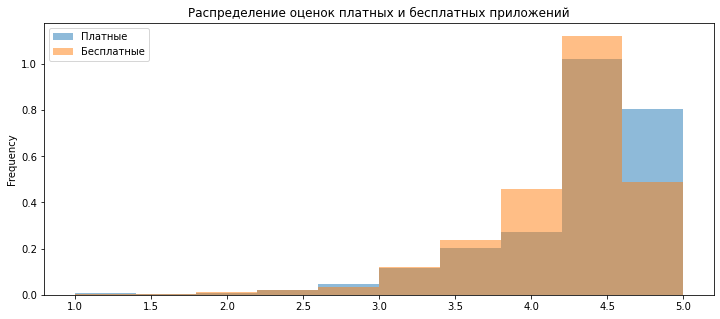

In [66]:
# изучим, какие оценки в основном выставляют платным и бесплатным приложениям
df.loc[df.Type=='Paid']['Rating'].plot(kind='hist',
                                       title='Распределение оценок платных и бесплатных приложений',
                                       alpha=0.5,
                                       density=True,
                                       label='aaa')
df.loc[df.Type=='Free']['Rating'].plot(kind='hist',
                                       alpha=0.5,
                                       density=True)

plt.legend(["Платные", "Бесплатные"])

Из гистограммы выше наблюдаем, что пользователи гораздо чаще выставляют рейтинг 5.0 платным приложениям, нежели бесплатным. Бесплатные же приложения редко удостаиваются оценки 5.0. Наиболее распространённая оценка бесплатных приложений - 4.5. Связано это может быть с тем, что разработчики платных приложений предоставляют более качественный продукт, который пользователи более охотно оценивают на высший балл. В целом же пользователи ставят больше положительных оценок, нежели отрицательных - средняя и медианная оценки всех приложений в маркете выше 4.0.

<AxesSubplot:title={'center':'Распределение размера загруженных приложений'}>

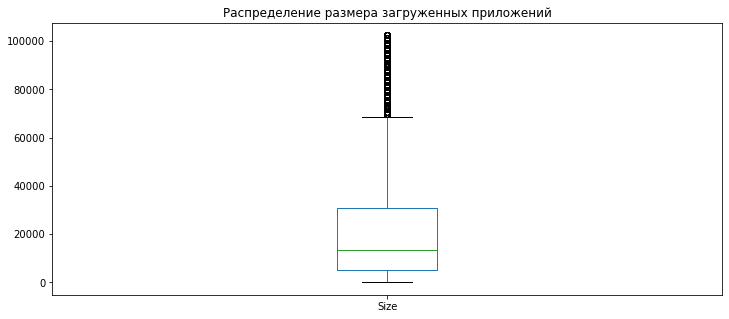

In [56]:
# исследуем размеры приложений
df.Size.plot(kind='box',
             title='Распределение размера загруженных приложений')

Видим, что медианный размер приложений во всём маркете - около 13 Мб. Наблюдается большое количество верхних выбросов, это означает, что процент "тяжеловесных" приложений в маркете сравнительно мал. Скорее всего, это игры, которые требуют большое количество ресурсов. Можно это проверить:

<AxesSubplot:title={'center':'Средний размер приложений по категориям'}, xlabel='Category'>

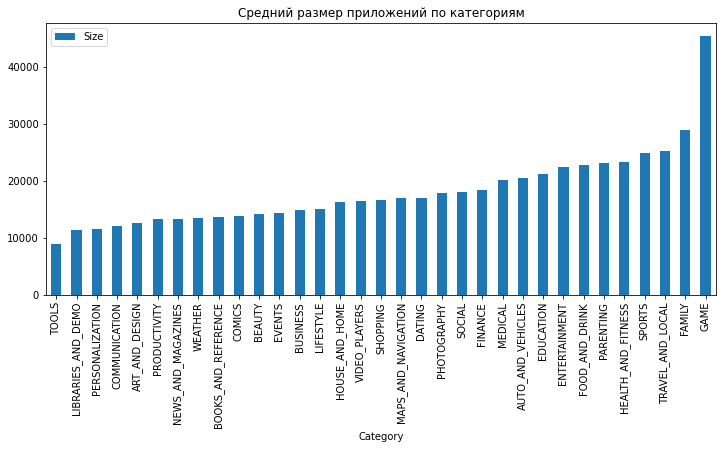

In [57]:
# средний размер приложений в каждой категории
df[['Category', 'Size']].groupby('Category').mean().sort_values(by='Size').plot(kind='bar',
                                                          title='Средний размер приложений по категориям')

Действительно, самые "тяжёлые" приложения во всём маркете - это игры.

Text(0.5, 1.0, 'Распределение оценок приложений по категориям')

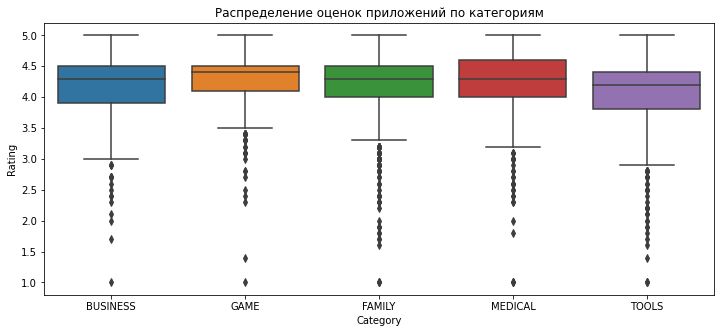

In [332]:
# изучим распределение оценок по категориям 
# возьмём 5 категорий с наибольшим количеством приложений в них
top_categories = df.Category.value_counts().head().index.values
sns.boxplot(x="Category", y="Rating",
            data=df[df.Category.isin(top_categories)]).set_title('Распределение оценок приложений по категориям')

Видим, что самая большая медиана рейтинга приложений в категории Игры. Межквартильный размах самый маленький в этой же категории. Это значит, что играм чаще выставляют более высокие оценки, чем приложениям в других категориях. Это может быть связано с тем, что разработчики игр чаще других вставляют в свои приложения всплывающие окошки с просьбой оценить приложение и предлагают внутриигровое поощрение за высокие оценки.

<AxesSubplot:xlabel='Content Rating', ylabel='Category'>

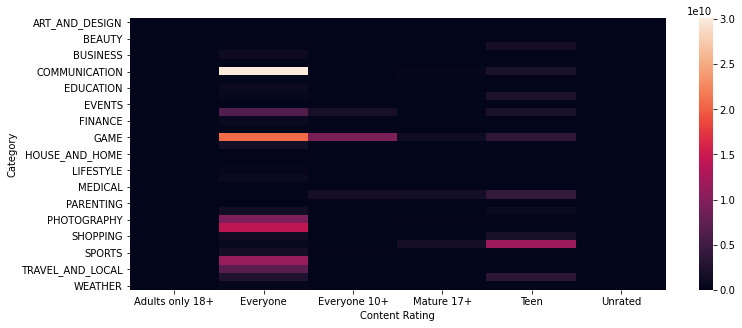

In [65]:
# изучим количество скачиваний в каждой категории с учётом возрастного ограничения
downloads = df.pivot_table(
                        index='Category', 
                        columns='Content Rating', 
                        values='Installs', 
                        aggfunc=sum).fillna(0)
sns.heatmap(downloads)

Наблюдаем, что наибольшее количество скачиваний по категории контента - для игр, а по возрастной категории - "Для всех" и "Для подростков". Отдельно стоит отметить большое количество скачиваний приложений в категории "Общение" - это разнообразные мессенджеры.  

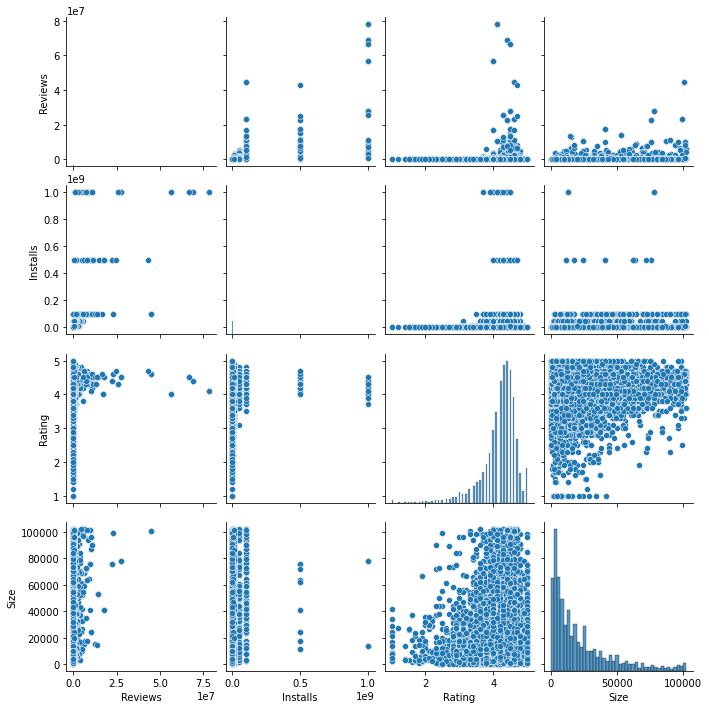

In [62]:
# исследуем взаимосвязи числовых признаков приложений
sns.pairplot(df, vars=['Reviews', 'Installs', 'Rating', 'Size'])

Наблюдается несколько очевидных тенденций. Так, например, пользователи чаще пишут отзывы к приложениям с высоким рейтингом и с большим размером. Число оценок уменьшается с ростом размера приложения, при этом "тяжёлым" приложениям чаще выставляют положительные оценки. Можно сделать вывод: если приложение имеет большой размер и высокий рейтинг, то это с высокой вероятностью игра. Пользователи любят игры. 